## Etapa 8: Entendendo a Acuracia de 95%

Nos 3 modelos treinados, obtivemos uma acurácia de 95%, sendo assim vamos aplicar este mesmo modelo em dataset distindos, é esperado que sua performance diminua. Além disso vamos analisar o dataset utilizado para encontrar pontos que justifiquem a boa acuracia. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# importa funções para redes neurais
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

import seaborn as sns
sns.set(context='talk', rc={'figure.figsize':(20,8)})

In [3]:
reviews = pd.read_csv('reviews_geral_limpo.csv', index_col=0)
reviews.head(1)

,content,score
0,gente mudem pro design anterior a interface ta...,1


In [4]:
reviews.score.value_counts()

0    119253
1    117704
Name: score, dtype: int64

In [5]:
X = reviews['content'].values.astype(str)
y = reviews['score'].values.astype(str)

In [6]:
max_features = 50000
maxlen = 200

# treina um tokenizador nos dados de treino
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
len(tokenizer.word_index)

53153

In [7]:
# tokeniza os dados
X_token = tokenizer.texts_to_sequences(X) 

In [8]:
lista_tamanho = []
lista_soma = []
for token in X_token:
    lista_tamanho.append(len(token))
    lista_soma.append(sum(token))

In [9]:
reviews['tamanho'] = lista_tamanho
reviews['soma'] = lista_soma

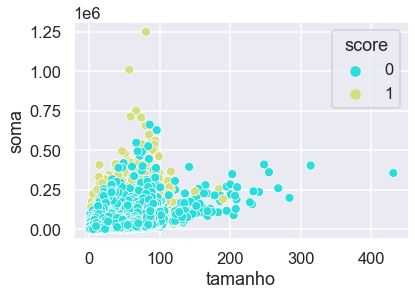

In [12]:
# plot treino
sns_plot = sns.scatterplot(x='tamanho', y='soma', data=reviews, palette='rainbow', hue="score")

In [15]:
sns_plot.figure.savefig("tamanhoXsoma.png")

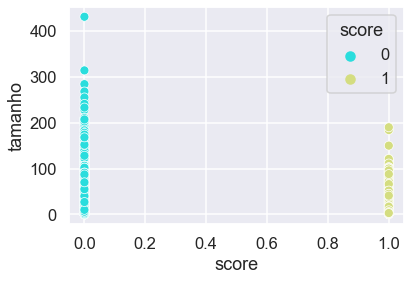

In [16]:
# plot treino
_ = sns.scatterplot(x='score', y='tamanho', data=reviews, palette='rainbow', hue="score")

In [17]:
_.figure.savefig("scoreXtamanho.png")

É possivel ver uma tendencia nos comentários positivos, pois em média o tamanho dos reviews é menor.

In [137]:
reviews[reviews['score']==1].describe()

,score,tamanho,soma
count,117704.0,117704.000000,1.177040e+05
mean,1.0,14.758046,1.385920e+04
std,0.0,15.311660,2.795357e+04
min,1.0,1.000000,1.000000e+00
25%,1.0,5.000000,8.200000e+02
50%,1.0,10.000000,3.762000e+03
75%,1.0,19.000000,1.403225e+04
max,1.0,190.000000,1.250917e+06


In [138]:
reviews[reviews['score']==0].describe()

,score,tamanho,soma
count,119253.0,119253.000000,119253.000000
mean,0.0,33.554334,24190.116685
std,0.0,21.716956,29384.757061
min,0.0,0.000000,0.000000
25%,0.0,17.000000,5816.000000
50%,0.0,28.000000,13783.000000
75%,0.0,45.000000,31775.000000
max,0.0,431.000000,663052.000000


Por fim, vamos usar o nosso modelo treinado com uma RNN para predizer outros datasets já rotulado, e assim avaliar sua acurácia.

In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

import os

In [97]:
# Carregando json e criando o modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Carregando pesos para o novo modelo
loaded_model.load_weights("model.h5")
print("Modelo carregado com Sucesso")

Modelo carregado com Sucesso


In [98]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 64)           2560000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 250, 64)           24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250, 64)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                24832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,609,729
Trainable params: 2,609,729
Non-trainable params: 0
____________________________________________

#### 1 - Dataset IMDB
O Primeiro dataset são de avaliações de filmes do IMDB, são comentarios mais longos, em média 4x maiores do que o modelo treinado.

In [100]:
dataset_validacao = pd.read_csv('imdb_limpo.csv', index_col=0)
dataset_validacao.head()

,text_pt,sentiment
0,mais uma vez o sr costner arrumou um filme por...,0
1,este e um exemplo do motivo pelo qual a maiori...,0
2,primeiro de tudo eu odeio esses raps imbecis q...,0
3,nem mesmo os beatles puderam escrever musicas ...,0
4,filmes de fotos de latao nao e uma palavra apr...,0


<AxesSubplot:>

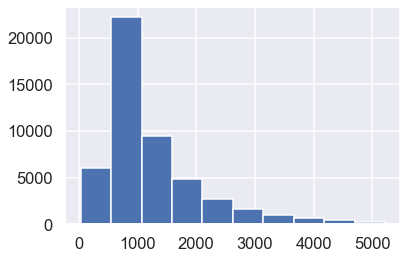

In [113]:
dataset_validacao['text_pt'].apply(len).hist()

In [103]:
y_pred_imdb = predicao(dataset_validacao.text_pt)

In [104]:
print("Acurácia:", metrics.accuracy_score(dataset_validacao.sentiment, y_pred_imdb))

Acurácia: 0.6565033664247154


Apesar de ser um dataset de reviews, os textos são muito mais elaborados e maiores e também não tem nada do contexto do dataset utilizado para treino, justificando uma acurácia baixa.

#### 2 - Dataset Tweets Aleatórios

O segundo dataset também são tweets, conforme nosso dataset alvo, porém são de assuntos aleatórios, o tamanho dos textos é menor do que foi treinado o modelo.

In [105]:
dataset_validacao2 = pd.read_csv('tweets_aleatorios_limpo.csv', index_col=0)

In [106]:
dataset_validacao2.head()

,tweet_text,sentiment
0,para eu ir,1
1,o meu like eu ja dei na epoca,1
2,eu so queria conseguir comer alguma coisa pra ...,1
3,d que lindo dia,1
4,pq da pr jeito e uma oferta ha q aproveitar p,1


<AxesSubplot:>

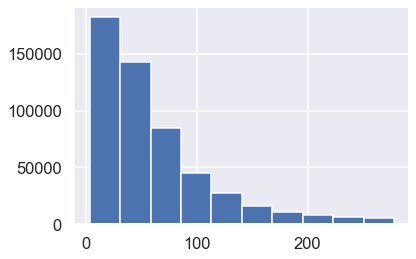

In [114]:
dataset_validacao2['tweet_text'].apply(len).hist()

In [107]:
y_pred_tweets = predicao(dataset_validacao2.tweet_text)

In [108]:
print("Acurácia:", metrics.accuracy_score(dataset_validacao2.sentiment, y_pred_tweets))

Acurácia: 0.5282620349118144


Apesar de serem textos curtos, a acurácia foi muito baixa, acreditamos que a falta de contexto e o excesso de textos que o mais correto seria uma avaliação neutra, comprometerem a performance.

#### 3 - Dataset Avaliações de produtos

Por fim vamos utilizar um outro dataset de avaliação, onde os textos são em média no tamanho do modelo treinado, este dataset também utiliza avaliações de 1 a 5, e, da mesma forma que o dataset utilizado para o treino do modelo, também vamos considerar apenas as avaliações 1 como negativas e 5 como positivas, além de possuirem um pouco de contexto.

In [109]:
dataset_validacao3 = pd.read_csv('B2W_limpo.csv', index_col=0)

In [110]:
dataset_validacao3.head()

,overall_rating,review_text
9,0,meu produto nao foi entregue e a americanas es...
13,0,esse celular nao vale nada a bateria nao vale ...
25,0,eu nao recebi o produto e a americanas sabe di...
31,0,nao recebi segundo o correio o endereco estava...
33,0,comprei o produto que veio com defeito montamo...


<AxesSubplot:>

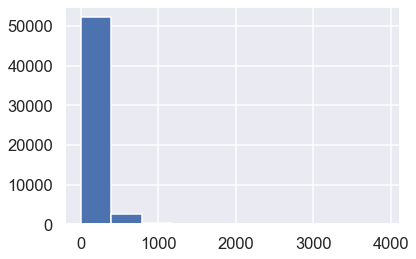

In [115]:
dataset_validacao3['review_text'].apply(len).hist()

In [111]:
y_pred_b2w = predicao(dataset_validacao3.review_text)

In [112]:
print("Acurácia:", metrics.accuracy_score(dataset_validacao3.overall_rating, y_pred_b2w))

Acurácia: 0.9100434310532031


Como trata-se de um dataset bem parecido, esperavamos que a acuracia fosse maior, mas acima de 90% realmente foi uma surpresa.